In [5]:
cd C:/Users/0105l/Desktop/데청캠_모델/Rhythm-of-Chika-data/Datasets/6/

C:\Users\0105l\Desktop\데청캠_모델\Rhythm-of-Chika-data\Datasets\6


In [6]:
gesture_list = ['URF','UMF','ULF','DLF','DMF','DRF','URB','UMB','ULB','DLB','DMB','DRB','URO','ULO','DLO','DRO']

<AxesSubplot:>

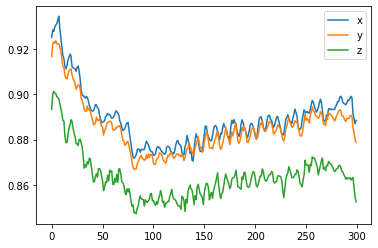

In [8]:
# ULF - 7

import pandas as pd
import numpy as np
pos_1 = np.load('Right_ULF_p_5.npy')[50:350]

pos = pd.DataFrame(pos_1[:, 7, :], columns=['x', 'y', 'z'])
pos.plot()

In [9]:
#acceleration => numpy array 구하기
velocity = np.zeros((1,21,3))
acceleration = np.zeros((1,21,3))


for i in range(len(pos_1)-1):
    current_velocity = pos_1[i+1] - pos_1[i]
    velocity = np.vstack((velocity, current_velocity.reshape(1,21,3)))

velocity = velocity[1:]

for i in range(len(velocity)-1):
    current_acceleration = velocity[i+1] - velocity[i]
    acceleration = np.vstack((acceleration, current_acceleration.reshape(1,21,3)))

acceleration = acceleration[1:]

# acc_1_df => pd.DataFrame
# 이상치의 index 추출
acc_1_df = pd.DataFrame(acceleration[:,7,:], columns=['x','y','z']) # <= 여기서 랜드마크 번호 수정
idx_list=[]
axis = ['x','y','z']
for i in axis:
    q3=acc_1_df['%s' % (i)].quantile(0.75)
    q1=acc_1_df['%s' % (i)].quantile(0.25)
    iqr=q3-q1
    outlier_top=q3+1.5*iqr
    outlier_bottom=q1-1.5*iqr

    idx=acc_1_df[(acc_1_df['%s' % (i)]<outlier_bottom) | (acc_1_df['%s' % (i)]>outlier_top)].index
    for i in idx:
        idx_list.append(str(i))
    idx_list.append('end')

# x,y,z를 구분하는 'end' string 때문에 전처리 진행
idx_string = ' '.join(idx_list)
idx_string_split = idx_string.split('end')
x_outlier_str = idx_string_split[0].strip()
y_outlier_str = idx_string_split[1].strip()
z_outlier_str = idx_string_split[2].strip()

# 문자열에서 int로 된 이상치 인덱스 리스트로 변환
x_outlier = list(map(int, x_outlier_str.split(' ')[:-1]))
y_outlier = list(map(int, y_outlier_str.split(' ')[:-1]))
z_outlier = list(map(int, z_outlier_str.split(' ')[:-1]))
 
# 양 옆에 있는 값의 평균으로 대체
acc_1_parsed = acceleration[:,7,:]
for i in range(len(pos_1)-1):
    if i in x_outlier:
        acc_1_parsed[i][0] = (acc_1_parsed[i-1][0] + acc_1_parsed[i+1][0])/2 
    if i in y_outlier:
        acc_1_parsed[i][1] = (acc_1_parsed[i-1][1] + acc_1_parsed[i+1][1])/2 
    if i in z_outlier:
        acc_1_parsed[i][2] = (acc_1_parsed[i-1][2] + acc_1_parsed[i+1][2])/2 
        
        
final_df = pd.DataFrame(acc_1_parsed, columns = ['x','y','z'])
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler().fit_transform(final_df)
acc_df = pd.DataFrame(standard_scaler, columns = ['x','y','z'])

In [10]:
acc_df.head()

,x,y,z
0,-2.324872,-2.077613,-1.795507
1,1.547519,-0.977272,-0.722050
2,-0.616942,0.844431,0.268766
3,-0.134031,-1.291128,-0.280134
4,0.481467,0.813572,0.332453


<AxesSubplot:>

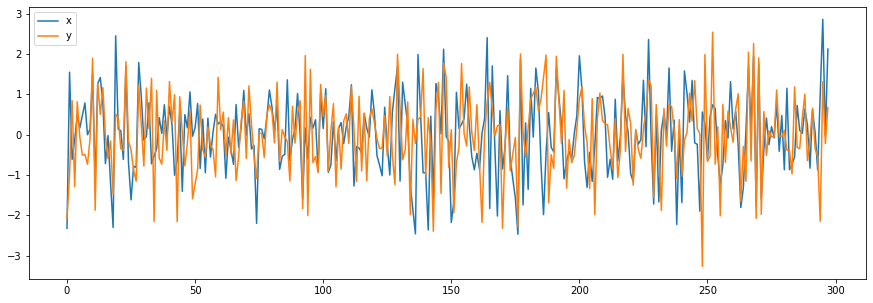

In [370]:
acc_df[['x','y']].plot(figsize = (15,5))

In [371]:
df_7_x = acc_df[['x']]
df_7_x.head()

,x
0,-2.324872
1,1.547519
2,-0.616942
3,-0.134031
4,0.481467


<AxesSubplot:>

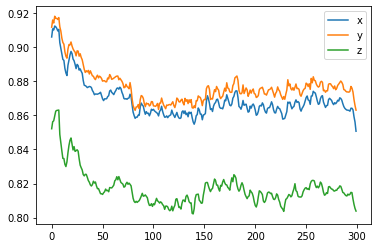

In [372]:
# ULF - 12

import numpy as np
pos_1 = np.load('Right_ULF_p_5.npy')[50:350]

pos = pd.DataFrame(pos_1[:, 12, :], columns=['x', 'y', 'z'])
pos.plot()

In [373]:
#acceleration => numpy array 구하기
velocity = np.zeros((1,21,3))
acceleration = np.zeros((1,21,3))


for i in range(len(pos_1)-1):
    current_velocity = pos_1[i+1] - pos_1[i]
    velocity = np.vstack((velocity, current_velocity.reshape(1,21,3)))

velocity = velocity[1:]

for i in range(len(velocity)-1):
    current_acceleration = velocity[i+1] - velocity[i]
    acceleration = np.vstack((acceleration, current_acceleration.reshape(1,21,3)))

acceleration = acceleration[1:]

# acc_1_df => pd.DataFrame
# 이상치의 index 추출
acc_1_df = pd.DataFrame(acceleration[:,12,:], columns=['x','y','z']) # <= 여기서 랜드마크 번호 수정
idx_list=[]
axis = ['x','y','z']
for i in axis:
    q3=acc_1_df['%s' % (i)].quantile(0.75)
    q1=acc_1_df['%s' % (i)].quantile(0.25)
    iqr=q3-q1
    outlier_top=q3+1.5*iqr
    outlier_bottom=q1-1.5*iqr

    idx=acc_1_df[(acc_1_df['%s' % (i)]<outlier_bottom) | (acc_1_df['%s' % (i)]>outlier_top)].index
    for i in idx:
        idx_list.append(str(i))
    idx_list.append('end')

# x,y,z를 구분하는 'end' string 때문에 전처리 진행
idx_string = ' '.join(idx_list)
idx_string_split = idx_string.split('end')
x_outlier_str = idx_string_split[0].strip()
y_outlier_str = idx_string_split[1].strip()
z_outlier_str = idx_string_split[2].strip()

# 문자열에서 int로 된 이상치 인덱스 리스트로 변환
x_outlier = list(map(int, x_outlier_str.split(' ')[:-1]))
y_outlier = list(map(int, y_outlier_str.split(' ')[:-1]))
z_outlier = list(map(int, z_outlier_str.split(' ')[:-1]))
 
# 양 옆에 있는 값의 평균으로 대체
acc_1_parsed = acceleration[:,12,:]
for i in range(len(pos_1)-1):
    if i in x_outlier:
        acc_1_parsed[i][0] = (acc_1_parsed[i-1][0] + acc_1_parsed[i+1][0])/2 
    if i in y_outlier:
        acc_1_parsed[i][1] = (acc_1_parsed[i-1][1] + acc_1_parsed[i+1][1])/2 
    if i in z_outlier:
        acc_1_parsed[i][2] = (acc_1_parsed[i-1][2] + acc_1_parsed[i+1][2])/2 
        
        
final_df = pd.DataFrame(acc_1_parsed, columns = ['x','y','z'])
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler().fit_transform(final_df)
acc_df = pd.DataFrame(standard_scaler, columns = ['x','y','z'])

In [374]:
acc_df.head()

,x,y,z
0,-2.354043,-2.040602,-1.668946
1,1.314254,1.944974,1.147687
2,-1.188740,-1.800284,-0.069503
3,-0.177473,0.472733,-1.083794
4,-0.232287,-0.297793,-0.117441


<AxesSubplot:>

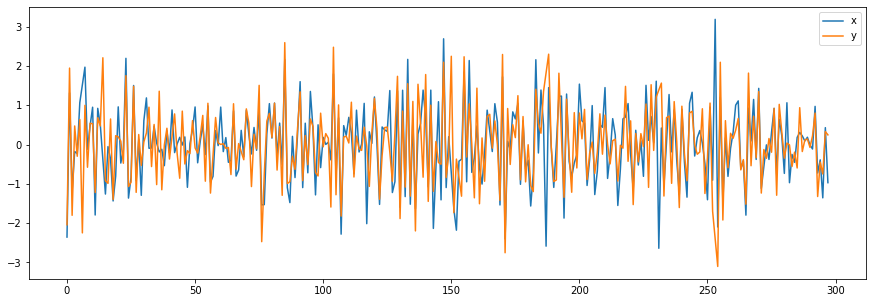

In [375]:
acc_df[['x','y']].plot(figsize = (15,5))

In [376]:
df_12_y = acc_df[['y']]
df_12_y.head()

,y
0,-2.040602
1,1.944974
2,-1.800284
3,0.472733
4,-0.297793


In [377]:
df = pd.concat([df_7_x, df_12_y], axis=1)
df.head()

,x,y
0,-2.324872,-2.040602
1,1.547519,1.944974
2,-0.616942,-1.800284
3,-0.134031,0.472733
4,0.481467,-0.297793


In [378]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

mean_list = []
for gesture in gesture_list:
    df = np.load('Right_ULF_p_5.npy')
    
    coef = []
    for i in range(50, 350):
        frame1 = df[i][7][0:2]
        frame2 = df[i][12][0:2]
        #frame3 = df[i][4][0:2]
        frame = []
        frame.append(frame1)
        frame.append(frame2)
        #frame.append(frame3)

        frame = pd.DataFrame(frame, columns= ['x','y'])
        X = frame['x']
        y = frame['y']
        
        line_fitter = LinearRegression()
        line_fitter.fit(X.values.reshape(-1,1), y)
        coef.append(line_fitter.coef_)
    coef = pd.DataFrame(coef, columns= ['coef'])
    
q3=coef['coef'].quantile(0.75)
q1=coef['coef'].quantile(0.25)
iqr=q3-q1
outlier_top=q3+1.5*iqr
outlier_bottom=q1-1.5*iqr

idx=coef[(coef['coef']<outlier_bottom) | (coef['coef']>outlier_top)].index

In [379]:
idx

Int64Index([73, 77, 78, 79, 89, 138, 182, 183], dtype='int64')

In [380]:
idx_list=[]
for i in idx:
    idx_list.append(str(i))
idx_list.append('end')


idx_string = ' '.join(idx_list)
idx_string_split = idx_string.split('end')
outlier_str = idx_string_split[0].strip()
outlier = list(map(int, outlier_str.split(' ')))


for i in range(len(coef)-1):
    if i in outlier:
        coef['coef'][i] = (coef['coef'][i-1] + coef['coef'][i+1])/2 

In [381]:
coef.head()

,coef
0,0.261900
1,0.343445
2,0.517669
3,0.267354
4,0.371033


In [382]:
coef.describe()

,coef
count,300.000000
mean,0.390270
std,0.133748
min,-0.140090
25%,0.315943
50%,0.401507
75%,0.490294
max,0.718300


In [241]:
# pd.set_option('display.max_rows', None)